In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, f1_score
from sklearn import preprocessing
import seaborn as sns
from matplotlib import pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

# Data Exploration

In [5]:
# Load the Parkinson's dataset
parkinson_data = pd.read_csv("audio_features_I.csv")

# Extract the features and labels
X = parkinson_data.drop(['name','status'], axis=1) # MFCC feature vectors
y = parkinson_data['status'] # labels (0 = healthy, 1 = Parkinson's)

In [6]:
parkinson_data

,name,status,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
0,HC_f_i_c,0,-269.07350,66.353860,185.646850,7.897715,-100.958810,-19.586279,-195.660030,-21.654877,-62.401306,-120.911410,-4.210290,-100.678276,-7.354792
1,HC_f_i_c1,0,-450.48570,205.205670,272.529450,90.492320,35.625190,-1.940757,-176.789980,-40.466630,-81.212830,-60.840515,8.775168,-50.195538,47.180020
2,HC_f_i_f,0,-361.32956,175.374570,182.707760,16.704912,-7.187014,-95.439730,-193.817210,-62.394780,-124.953865,20.409529,-54.652430,47.469227,-36.544857
3,HC_f_i_g,0,-401.72800,191.882200,243.485950,37.874638,-119.728220,-27.576942,-225.652340,69.089460,-112.667946,-41.470737,-38.295708,13.833961,-6.681055
4,HC_f_i_g1,0,-545.14484,172.819630,262.874480,38.449368,48.375946,-22.259695,-110.605100,-12.514828,-112.024475,-1.960620,-43.101930,-5.487234,12.214955
5,HC_f_i_m,0,-446.37670,212.696170,221.979420,90.069214,9.024749,10.059669,-152.870200,-27.303305,-132.023730,-34.917458,-16.543144,-34.131847,44.033200
6,HC_f_i_p,0,-352.55826,72.073235,253.621830,-75.001045,-21.031160,-158.928180,-260.652560,-59.213516,-202.066000,-29.483597,37.728240,-17.887060,23.157060
7,HC_f_i_p1,0,-463.82785,205.644000,291.923200,13.707854,-122.255520,2.650832,-242.503780,86.462030,-87.875060,-37.167637,-9.998446,-62.971740,36.685696
8,HC_h_i_a,0,-352.75696,207.418700,228.473070,93.215004,-135.797300,-14.607749,-150.832140,-162.048890,35.350410,-150.497000,-26.583817,-43.045850,14.521584
9,HC_h_i_a1,0,-355.47745,118.019040,196.452160,153.291400,-0.272375,29.518888,-162.862730,-38.974026,-142.763080,-30.114904,-93.440740,14.633948,-62.700275


In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [8]:
cv = KFold (n_splits=5, shuffle=True, random_state=42) 

# KNN

In [9]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'p': [1, 2]} 

grid_search = GridSearchCV(knn, param_grid, cv=cv)
grid_search.fit(X_train, y_train)      

print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.71      0.77      0.74        13

    accuracy                           0.70        23
   macro avg       0.69      0.68      0.69        23
weighted avg       0.69      0.70      0.69        23

Accuracy: 0.6956521739130435
F1-score: 0.7407407407407408


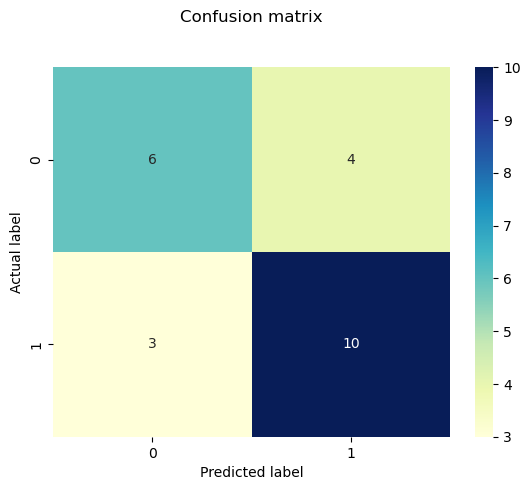

In [10]:
# Cross-validation pour estimer KNN-accuracy 
knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                           weights=grid_search.best_params_['weights'],
                           p=grid_search.best_params_['p'])

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# accuracy et f1_score
KNN_accuracy = accuracy_score(y_test, y_pred)
KNN_f1_score = f1_score(y_test, y_pred)

# matrice de confusion
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Classification report.
print(classification_report(y_test, y_pred))

print("Accuracy:", KNN_accuracy)
print("F1-score:", KNN_f1_score)

# SVM

In [11]:
SVM = SVC()
param_grid = {"C": [0.001, 0.0001, 0.1, 1.], "kernel": ["linear", "poly", "sigmoid"], "gamma": ["scale", "auto"]}

grid_search = GridSearchCV(SVM, param_grid, cv=cv)
grid_search.fit(X_train, y_train)      

print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}


              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.80      0.92      0.86        13

    accuracy                           0.83        23
   macro avg       0.84      0.81      0.82        23
weighted avg       0.83      0.83      0.82        23

Accuracy: 0.8260869565217391
F1-score: 0.8571428571428571


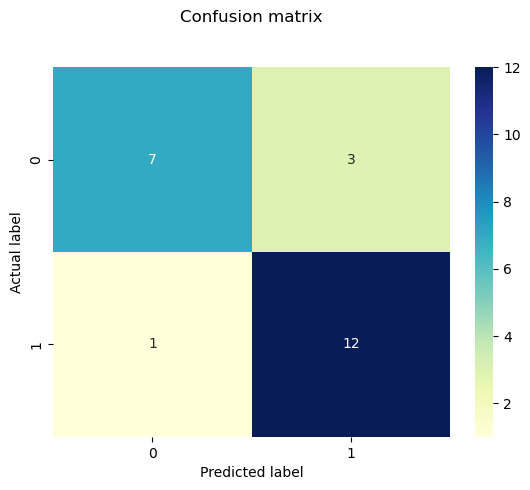

In [12]:
# Cross-validation pour estimer SVM-accuracy 
SVM = SVC(C=grid_search.best_params_['C'],
                           kernel=grid_search.best_params_['kernel'],
                           gamma=grid_search.best_params_['gamma'])

SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)

# accuracy et f1_score
SVM_accuracy = accuracy_score(y_test, y_pred)
SVM_f1_score = f1_score(y_test, y_pred)

# matrice de confusion
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Classification report.
print(classification_report(y_test, y_pred))

print("Accuracy:", SVM_accuracy)
print("F1-score:", SVM_f1_score)

# DT

In [13]:
DT = DecisionTreeClassifier()
param_grid = { 'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(DT, param_grid, cv=cv)
grid_search.fit(X_train, y_train)      

print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}


              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.73      0.62      0.67        13

    accuracy                           0.65        23
   macro avg       0.66      0.66      0.65        23
weighted avg       0.66      0.65      0.65        23

Accuracy: 0.6521739130434783
F1-score: 0.6666666666666667


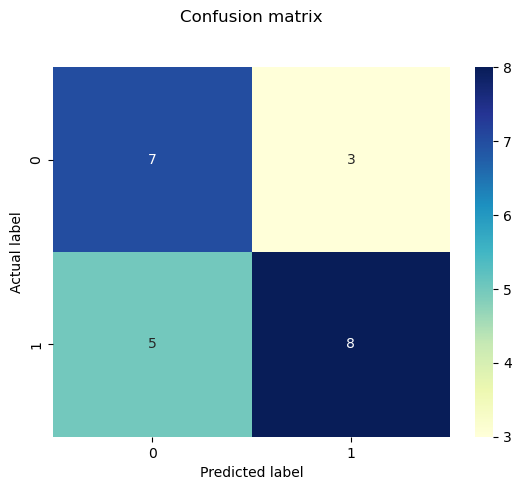

In [14]:
DT = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'],
                           min_samples_split=grid_search.best_params_['min_samples_split'],
                           min_samples_leaf=grid_search.best_params_['min_samples_leaf'], 
                           max_features= grid_search.best_params_['max_features'])                                  

DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

# accuracy et f1_score
DT_accuracy = accuracy_score(y_test, y_pred)
DT_f1_score = f1_score(y_test, y_pred)

# matrice de confusion
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Classification report.
print(classification_report(y_test, y_pred))

print("Accuracy:", DT_accuracy)
print("F1-score:", DT_f1_score)

# RF

In [15]:
RF = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(RF, param_grid, cv=cv)
grid_search.fit(X_train, y_train)      

print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


              precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.67      0.77      0.71        13

    accuracy                           0.65        23
   macro avg       0.65      0.63      0.63        23
weighted avg       0.65      0.65      0.65        23

Accuracy: 0.6521739130434783
F1-score: 0.7142857142857142


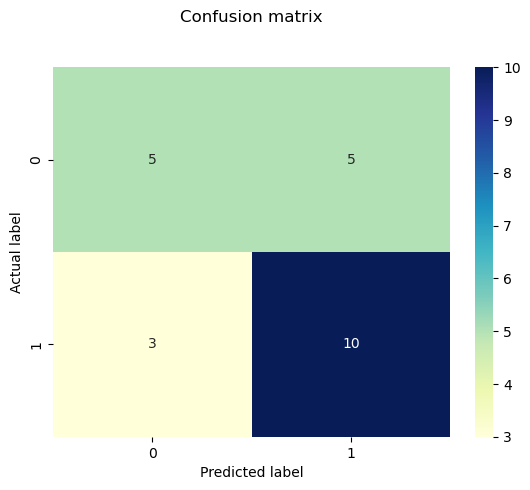

In [16]:
RF = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                           max_depth=grid_search.best_params_['max_depth'],
                           min_samples_split=grid_search.best_params_['min_samples_split'], 
                           min_samples_leaf= grid_search.best_params_['min_samples_leaf'], 
                           max_features= grid_search.best_params_['max_features'])

RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

# accuracy et f1_score
RF_accuracy = accuracy_score(y_test, y_pred)
RF_f1_score = f1_score(y_test, y_pred)

# matrice de confusion
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Classification report.
print(classification_report(y_test, y_pred))

print("Accuracy:", RF_accuracy)
print("F1-score:", RF_f1_score)

# LR

In [17]:
LR = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid_search = GridSearchCV(LR, param_grid, cv=cv)
grid_search.fit(X_train, y_train)      

print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}


              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.85      0.85      0.85        13

    accuracy                           0.83        23
   macro avg       0.82      0.82      0.82        23
weighted avg       0.83      0.83      0.83        23

Accuracy: 0.8260869565217391
F1-score: 0.8461538461538461


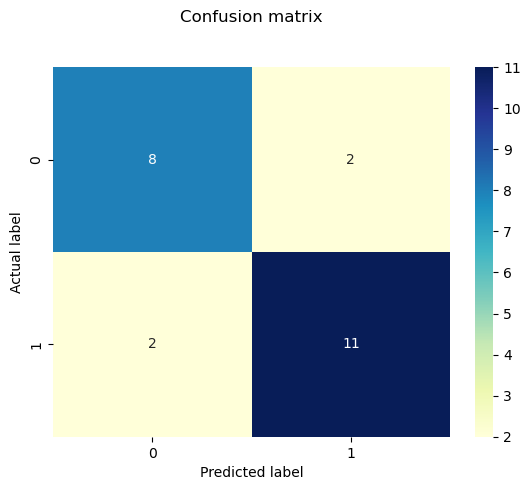

In [18]:
LR = LogisticRegression(C=grid_search.best_params_['C'],
                           penalty=grid_search.best_params_['penalty'],
                           solver=grid_search.best_params_['solver'])

LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

# accuracy et f1_score
LR_accuracy = accuracy_score(y_test, y_pred)
LR_f1_score = f1_score(y_test, y_pred)

# matrice de confusion
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Classification report.
print(classification_report(y_test, y_pred))

print("Accuracy:", LR_accuracy)
print("F1-score:", LR_f1_score)

In [24]:
print("Comparaison des performances:")
print("             Accuracy             ||     F1 score ")
print("KNN    "   , KNN_accuracy, "                ", KNN_f1_score)
print("SVM    "   , SVM_accuracy, "                ", SVM_f1_score)
print("DT     "   , DT_accuracy, "                ", DT_f1_score)
print("RF     "   , RF_accuracy, "                ", RF_f1_score)
print("LR     "   , LR_accuracy, "                ", LR_f1_score)

Comparaison des performances:
             Accuracy             ||     F1 score 
KNN     0.6956521739130435                  0.7407407407407408
SVM     0.8260869565217391                  0.8571428571428571
DT      0.6521739130434783                  0.6666666666666667
RF      0.6521739130434783                  0.7142857142857142
LR      0.8260869565217391                  0.8461538461538461
